In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/Bank-Customer-Attrition-Insights-Data.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [13]:
df.shape

(10000, 18)

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


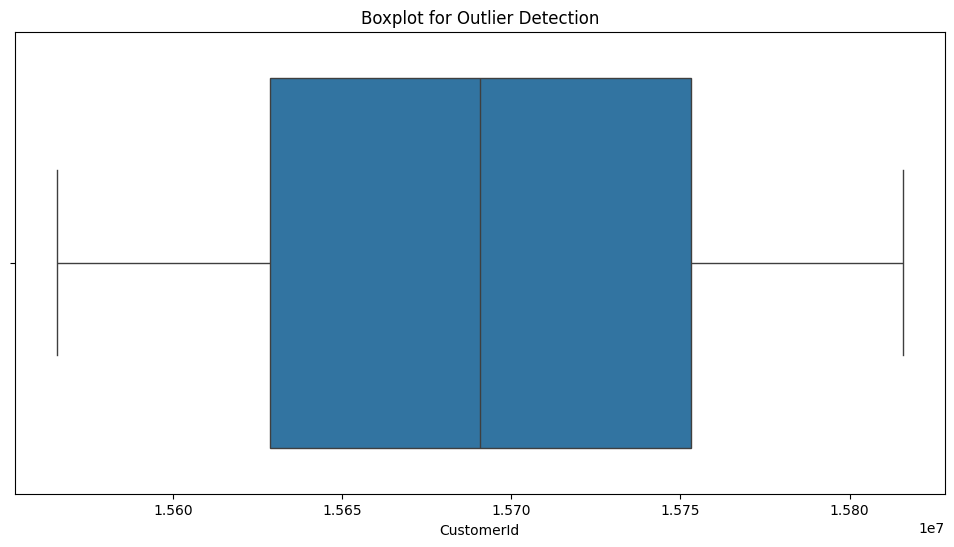

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(df.CustomerId,orient='h')
plt.xticks(rotation=0)
plt.title("Boxplot for Outlier Detection")
plt.show()

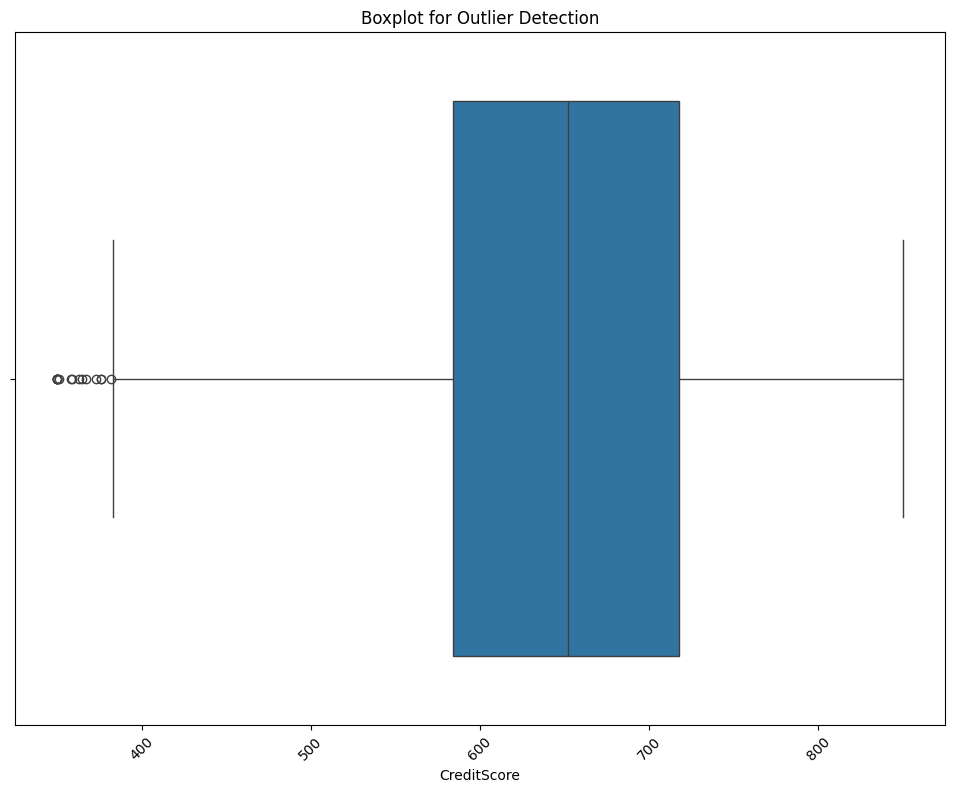

In [16]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.CreditScore,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

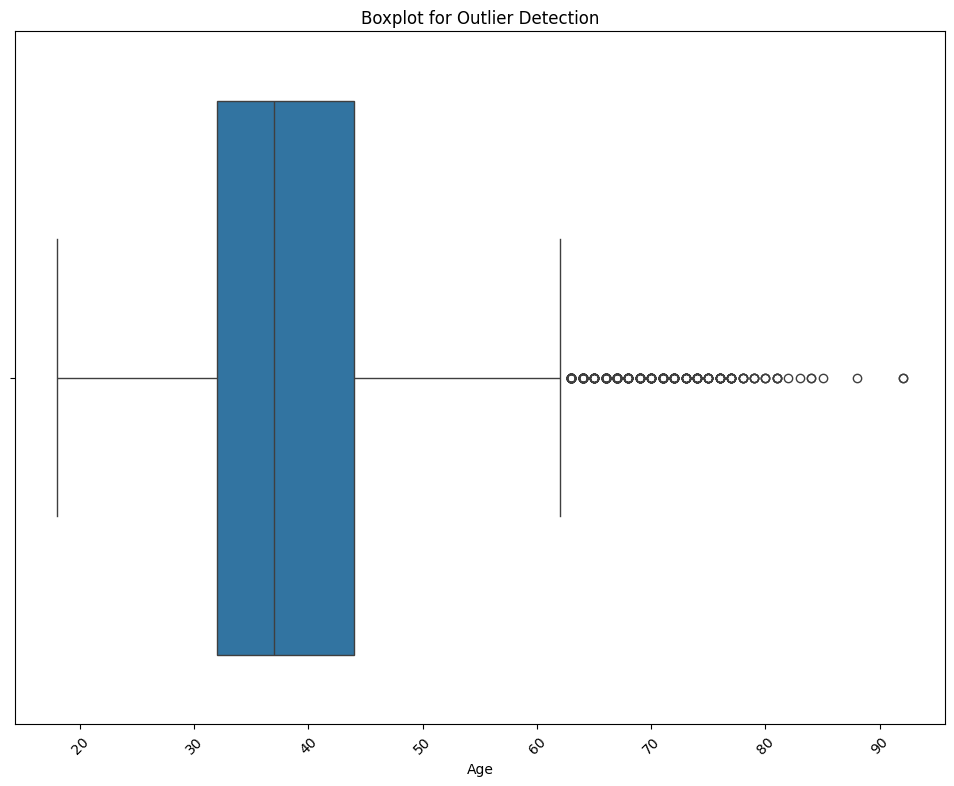

In [17]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.Age,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

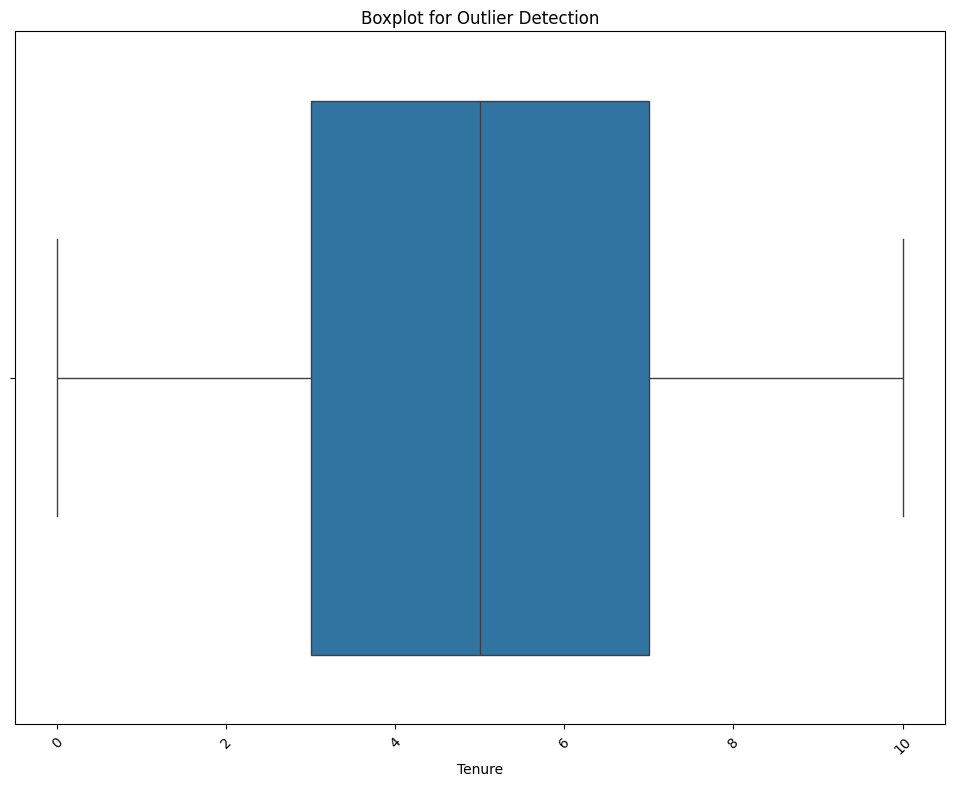

In [18]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.Tenure,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

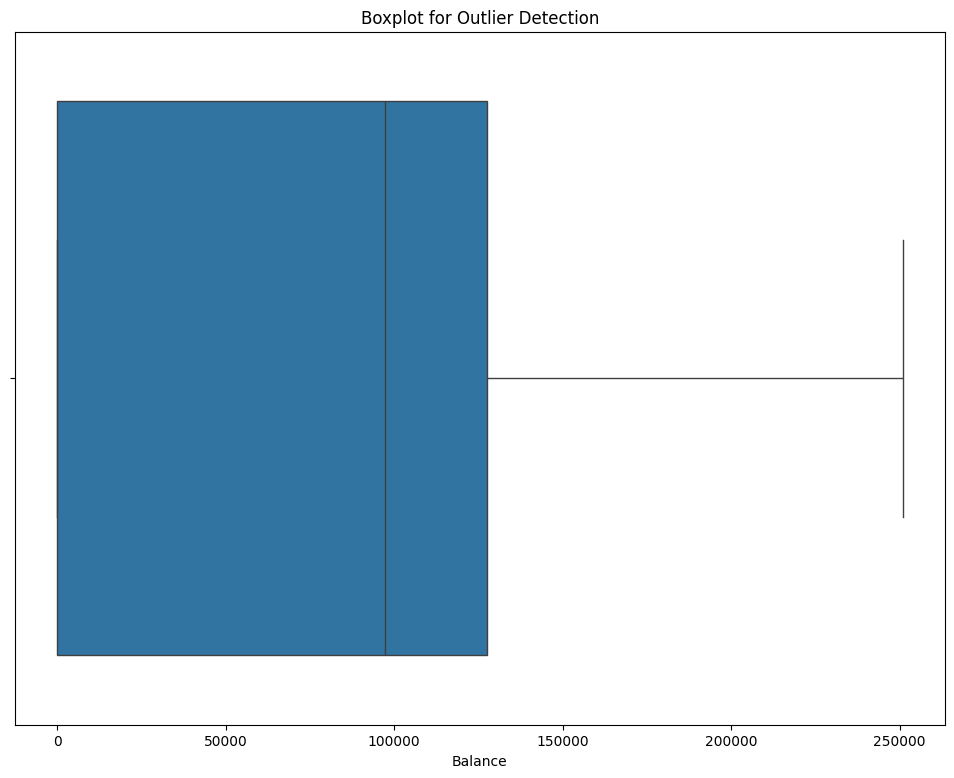

In [19]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.Balance,orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

Text(0.5, 1.0, 'Boxplot for Outlier Detection')

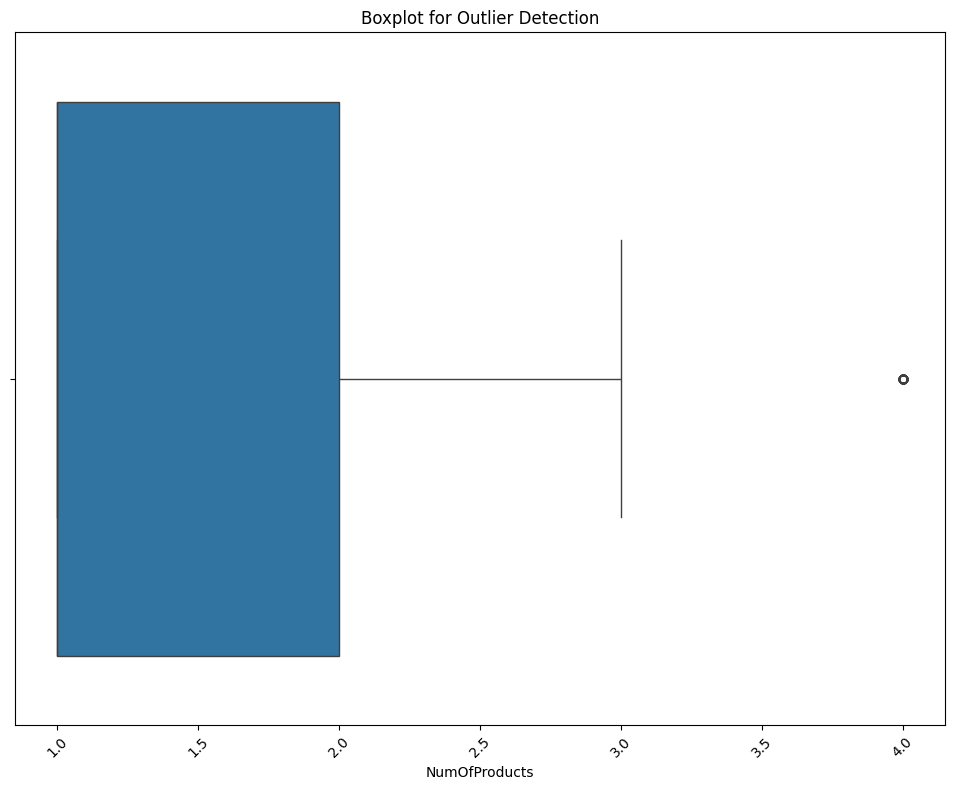

In [20]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.NumOfProducts,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")

Text(0.5, 1.0, 'Boxplot for Outlier Detection')

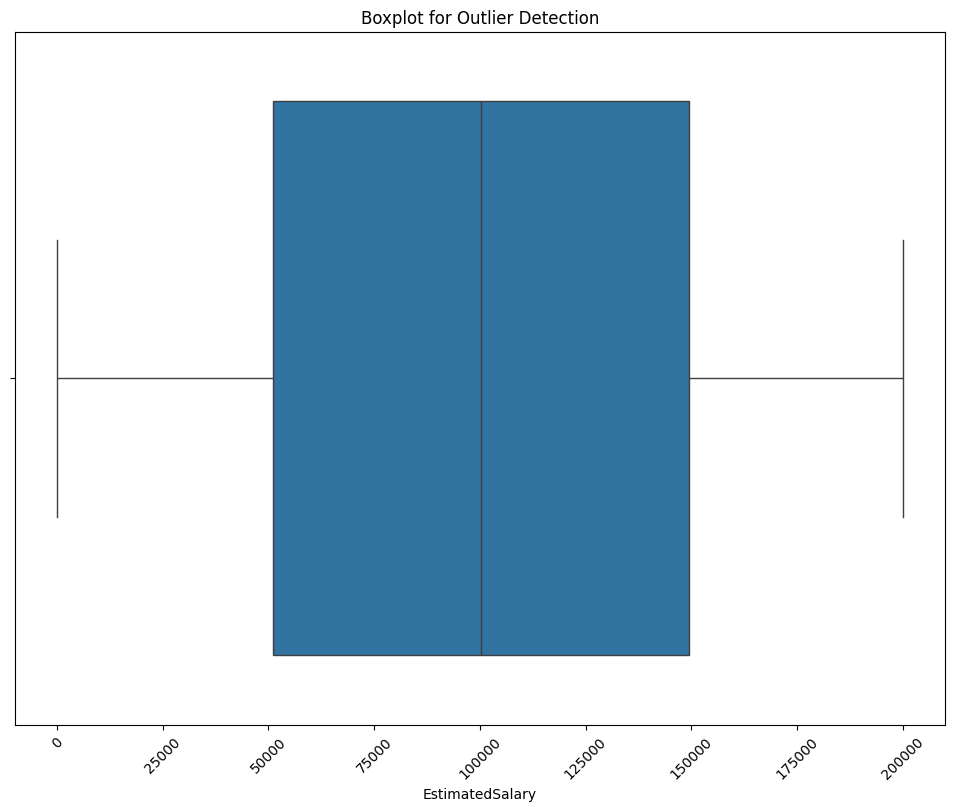

In [21]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.EstimatedSalary,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")

Text(0.5, 1.0, 'Boxplot for Outlier Detection')

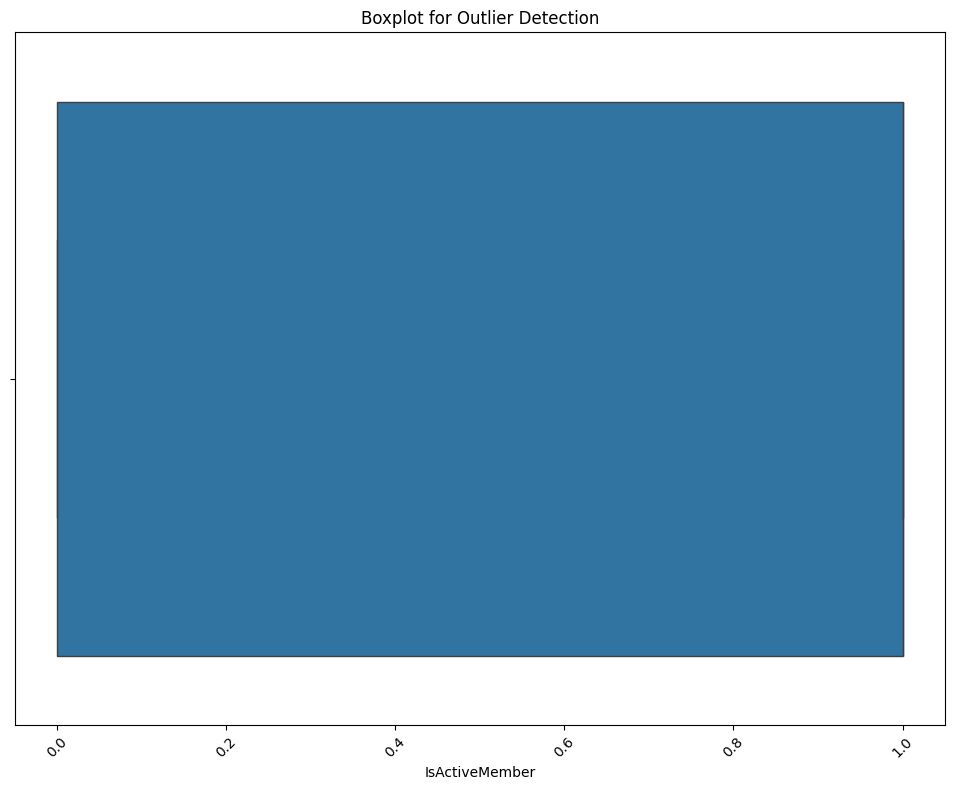

In [22]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.IsActiveMember,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")

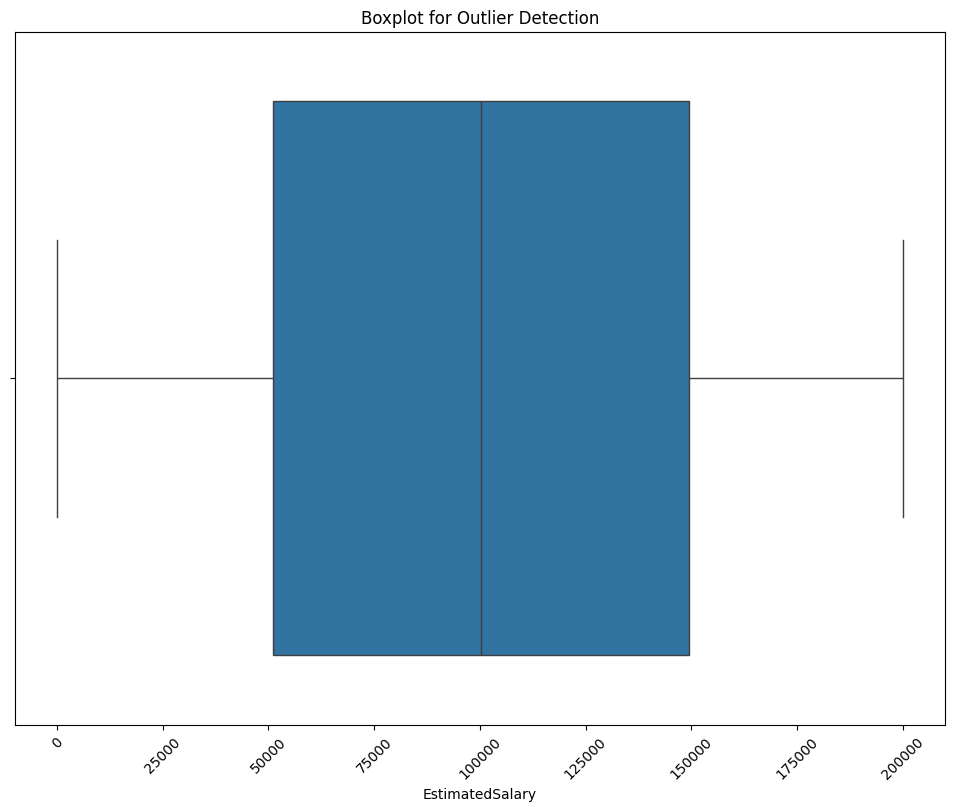

In [23]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.EstimatedSalary,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

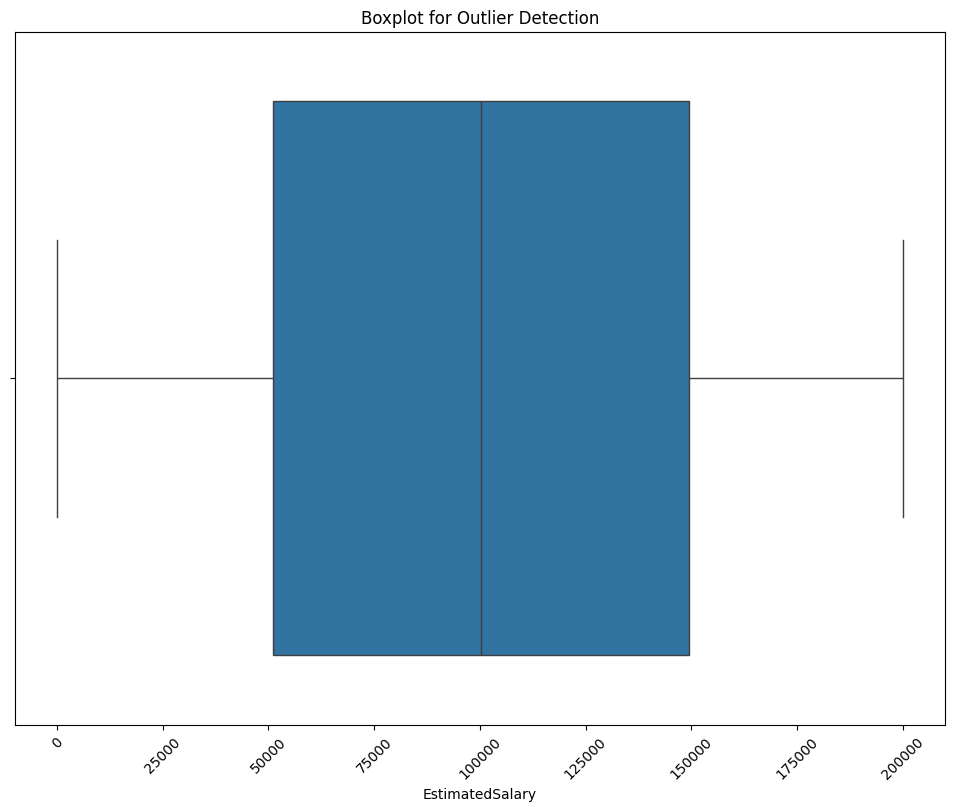

In [24]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df.EstimatedSalary,orient='h')
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [25]:
def remove_outliers(df):
    df_numeric = df.select_dtypes(include=[np.number])
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
    return df.loc[mask]
df_clean = remove_outliers(df)

In [26]:
df_clean = remove_outliers(df)

print(f"Original dataset size: {df.shape}")
print(f"Dataset size after outlier removal: {df_clean.shape}")

Original dataset size: (10000, 18)
Dataset size after outlier removal: (7666, 18)


In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [28]:
X = df.drop(columns=['IsActiveMember'])
y = df['IsActiveMember'].values
X_clean = df_clean.drop(columns=['IsActiveMember'])
y_clean = df_clean['IsActiveMember'].values

In [29]:
y.shape,y_clean.shape

((10000,), (7666,))

In [30]:
X.shape,X_clean.shape

((10000, 17), (7666, 17))

In [31]:
X = pd.get_dummies(X, drop_first=True)
X_clean = pd.get_dummies(X_clean, drop_first=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [34]:
svm_model = SVC()
rf_model = RandomForestClassifier()

svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred=svm_model.predict(X_test)
y_pred1=rf_model.predict(X_test)

In [37]:
print("\nSVM with outliers:")
print(classification_report(y_test, y_pred))
print("\nRandom Forest with outliers:")
print(classification_report(y_test, y_pred1))


SVM with outliers:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       951
           1       0.52      1.00      0.69      1049

    accuracy                           0.52      2000
   macro avg       0.26      0.50      0.34      2000
weighted avg       0.28      0.52      0.36      2000


Random Forest with outliers:
              precision    recall  f1-score   support

           0       0.55      0.50      0.53       951
           1       0.58      0.63      0.60      1049

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
svm_model_clean=SVC()
rf_model_clean=RandomForestClassifier()

In [39]:
svm_model_clean.fit(X_train_clean, y_train_clean)
rf_model_clean.fit(X_train_clean, y_train_clean)

RandomForestClassifier()

In [40]:
svm_preds_clean = svm_model_clean.predict(X_test_clean)
rf_preds_clean = rf_model_clean.predict(X_test_clean)

In [41]:
print("\nSVM without outliers:")
print(classification_report(y_test_clean, svm_preds_clean))
print("\nRandom Forest without outliers:")
print(classification_report(y_test_clean, rf_preds_clean))


SVM without outliers:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       672
           1       0.56      1.00      0.72       862

    accuracy                           0.56      1534
   macro avg       0.28      0.50      0.36      1534
weighted avg       0.32      0.56      0.40      1534


Random Forest without outliers:
              precision    recall  f1-score   support

           0       0.45      0.36      0.40       672
           1       0.57      0.66      0.61       862

    accuracy                           0.53      1534
   macro avg       0.51      0.51      0.51      1534
weighted avg       0.52      0.53      0.52      1534



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
